In [3]:
import numpy as np
from datasets import load_from_disk
import pandas as pd

In [3]:
# Load dataset
train_ds = load_from_disk("/gpfs/data/brandeslab/Data/processed_datasets/uniref90_tokenized_8192/train_only/train")

/gpfs/share/apps/anaconda3/gpu/2023.09/lib/python3.11/site-packages/datasets/table.py:1407: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [4]:
lengths = np.array(train_ds["length"])

In [5]:
bins = {
    "<=512": (lengths <= 512),
    "512-1024": ((lengths > 512) & (lengths <= 1024)),
    "1024-2048": ((lengths > 1024) & (lengths <= 2048)),
    "2048-8192": ((lengths > 2048) & (lengths <= 8192)),
    ">8192": (lengths > 8192)
}

In [6]:
total = len(lengths)
print(f"Total sequences: {total:,}\n")

Total sequences: 203,739,437



In [7]:
for name, mask in bins.items():
    count = mask.sum()
    proportion = count / total
    print(f"{name:>10}: {count:>10,} ({proportion:.2%})")

     <=512: 170,214,456 (83.55%)
  512-1024: 26,684,702 (13.10%)
 1024-2048:  5,768,973 (2.83%)
 2048-8192:  1,071,306 (0.53%)
     >8192:          0 (0.00%)


In [5]:
model_34M_res = pd.read_csv("/gpfs/data/brandeslab/Data/gLM_training_summary/oct-2025/Oct-long-runs - 34M.csv")
model_113M_res = pd.read_csv("/gpfs/data/brandeslab/Data/gLM_training_summary/oct-2025/Oct-long-runs - 113M.csv")
model_665M_res = pd.read_csv("/gpfs/data/brandeslab/Data/gLM_training_summary/oct-2025/Oct-long-runs - 665M.csv")
model_1B_res = pd.read_csv("/gpfs/data/brandeslab/Data/gLM_training_summary/oct-2025/Oct-long-runs - 1B.csv")
model_1B_res

,Day,GPU hours,epoch,auc
0,1,24,0.037,0.58890
1,2,48,0.074,0.65994
2,3,72,0.111,0.72682
3,4,96,0.148,0.76396
4,5,120,0.185,0.78240
5,6,144,0.222,0.80492
6,7,168,0.259,0.81262
7,8,192,0.296,0.82612
8,9,216,0.333,0.84074
9,10,240,0.370,0.84645


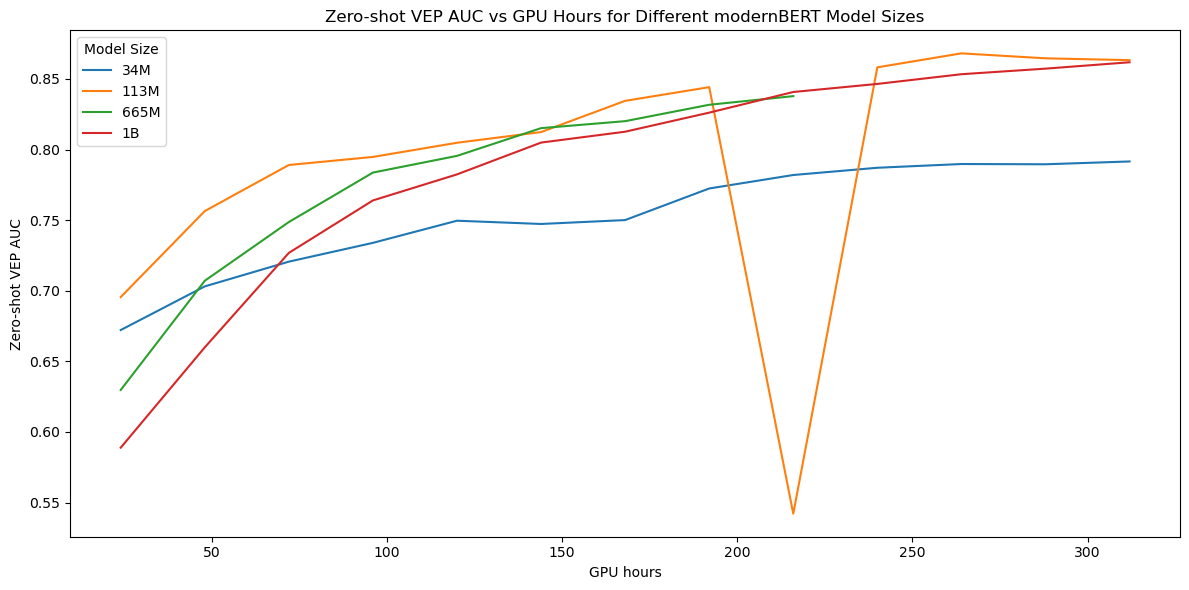

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

model_data = {
    "34M": model_34M_res,
    "113M": model_113M_res,
    "665M": model_665M_res,
    "1B": model_1B_res
}

plt.figure(figsize=(12,6))

for model_name, df in model_data.items():
    plt.plot(df["GPU hours"], df["auc"], label=model_name)

plt.xlabel("GPU hours")
plt.ylabel("Zero-shot VEP AUC")
plt.title("Zero-shot VEP AUC vs GPU Hours for Different modernBERT Model Sizes")
plt.legend(title="Model Size")
plt.grid(False)
plt.tight_layout()
plt.savefig("auc_vs_gpu_hours.png")
plt.show()


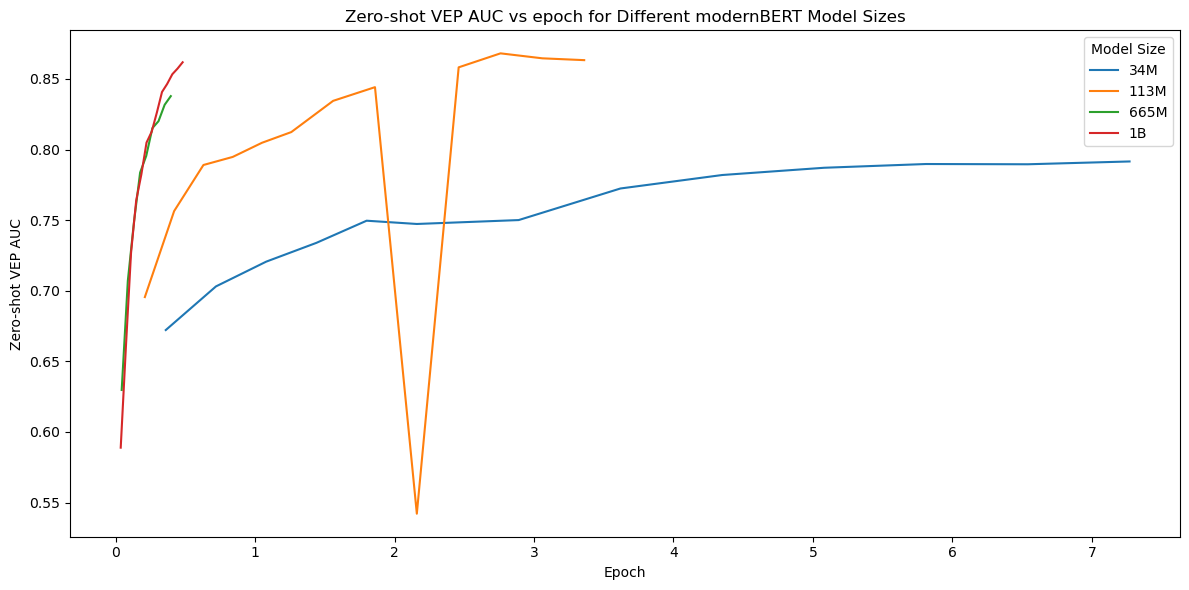

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

model_data = {
    "34M": model_34M_res,
    "113M": model_113M_res,
    "665M": model_665M_res,
    "1B": model_1B_res
}

plt.figure(figsize=(12,6))

for model_name, df in model_data.items():
    plt.plot(df["epoch"], df["auc"], label=model_name)

plt.xlabel("Epoch")
plt.ylabel("Zero-shot VEP AUC")
plt.title("Zero-shot VEP AUC vs epoch for Different modernBERT Model Sizes")
plt.legend(title="Model Size")
plt.grid(False)
plt.tight_layout()
plt.savefig("auc_vs_epoch.png")
plt.show()


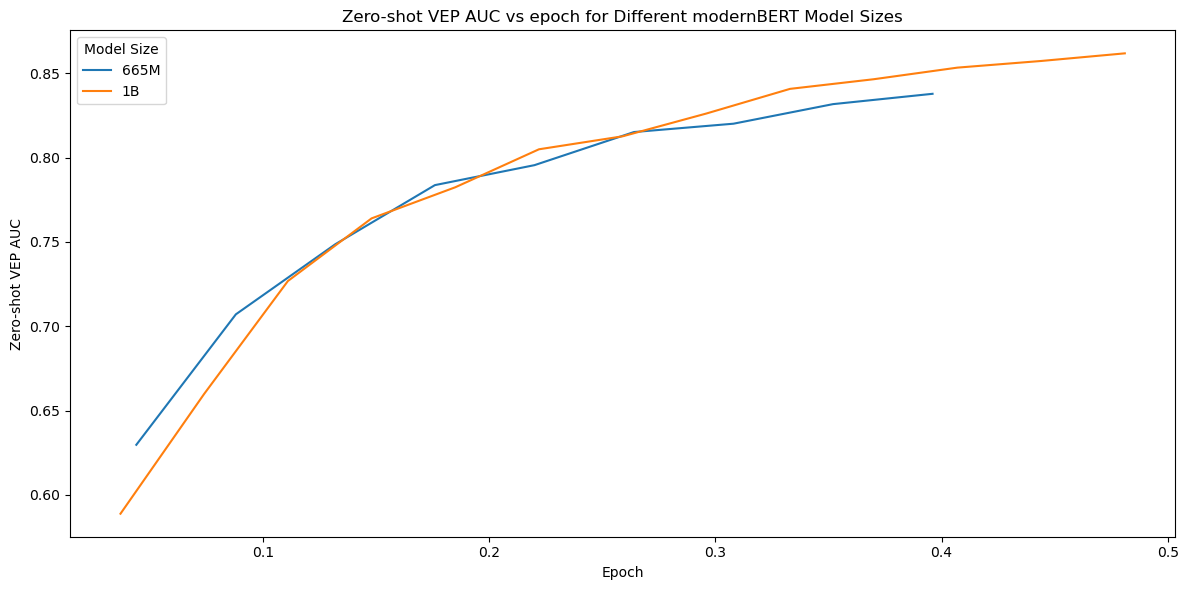

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

model_data = {
    "665M": model_665M_res,
    "1B": model_1B_res
}

plt.figure(figsize=(12,6))

for model_name, df in model_data.items():
    plt.plot(df["epoch"], df["auc"], label=model_name)

plt.xlabel("Epoch")
plt.ylabel("Zero-shot VEP AUC")
plt.title("Zero-shot VEP AUC vs epoch for Different modernBERT Model Sizes")
plt.legend(title="Model Size")
plt.grid(False)
plt.tight_layout()
plt.savefig("auc_vs_epoch_big_models.png")
plt.show()


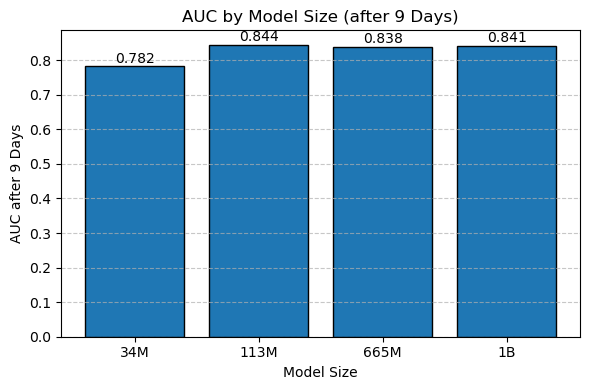

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

def auc_after_day(df, day):
    # Get the closest entry to the given day
    return df.iloc[(df["Day"] - day).abs().argmin()]["auc"]

# Collect AUCs after 9 days
auc_after_9 = {
    "34M": auc_after_day(model_34M_res, 9),
    "113M": auc_after_day(model_113M_res, 8),
    "665M": auc_after_day(model_665M_res, 9),
    "1B": auc_after_day(model_1B_res, 9),
}

auc_df_9 = pd.DataFrame(list(auc_after_9.items()), columns=["Model Size", "AUC after 9 Days"])

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(auc_df_9["Model Size"], auc_df_9["AUC after 9 Days"],
               edgecolor="black")

plt.xlabel("Model Size")
plt.ylabel("AUC after 9 Days")
plt.title("AUC by Model Size (after 9 Days)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.002,
             f"{height:.3f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.savefig("auc_bar_plot_9days.png", dpi=300)
plt.show()


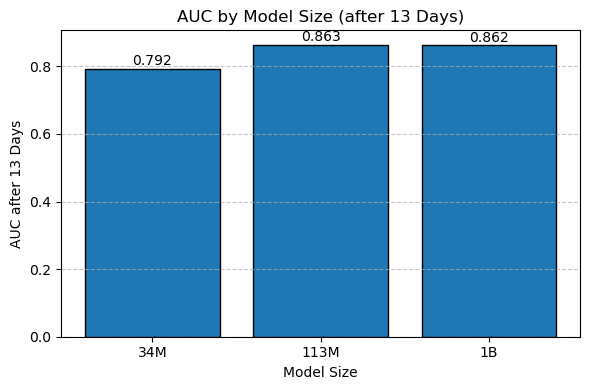

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

def auc_after_day(df, day):
    # Get the closest entry to the given day
    return df.iloc[(df["Day"] - day).abs().argmin()]["auc"]

# Collect AUCs
auc_after_13 = {
    "34M": auc_after_day(model_34M_res, 13),
    "113M": auc_after_day(model_113M_res, 13),
    "1B": auc_after_day(model_1B_res, 13),
}

auc_df_13 = pd.DataFrame(list(auc_after_13.items()), columns=["Model Size", "AUC after 13 Days"])

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(auc_df_13["Model Size"], auc_df_13["AUC after 13 Days"], edgecolor="black")

plt.xlabel("Model Size")
plt.ylabel("AUC after 13 Days")
plt.title("AUC by Model Size (after 13 Days)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.002,  # position
             f"{height:.3f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.savefig("auc_bar_plot_13days.png", dpi=300)
plt.show()